# Clustering: K-Means In-Depth

Here we'll explore **K Means Clustering**, which is an unsupervised clustering technique. This notebook is a slightly adapted version from the notebook that Jake van der Plas at the Olso Machine Learning workshop. 

Let's start with our standard set of initial imports.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Use seaborn plotting defaults
import seaborn as sns; sns.set()

## 1. Introducing K-Means

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the centroids (mean) of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple clusters in 2D space. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

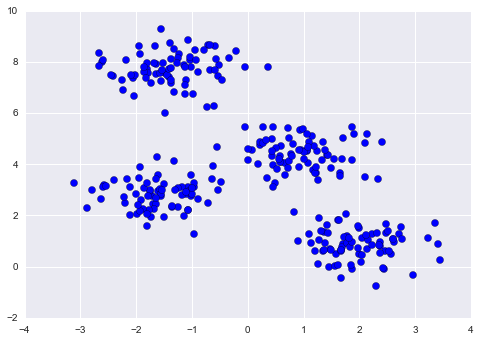

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

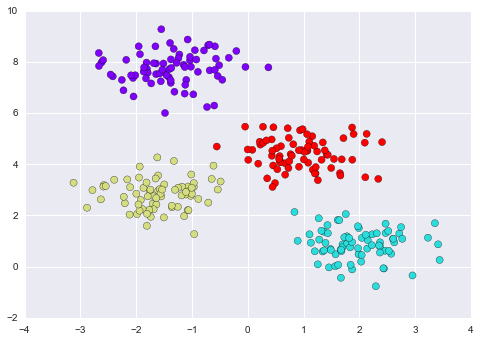

In [3]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

The algorithm identifies the four clusters of points in a manner very similar to what we would do by eye!

### KMeans Caveats

The convergence of this algorithm is not guaranteed; for that reason, scikit-learn by default uses a large number of random initializations and finds the best results.

Also, the number of clusters must be set beforehand... there are other clustering algorithms for which this requirement may be lifted.

## 2. Application of KMeans to Iris

First let's apply KMeans to the Iris dataset. Remember, there are 4 features (sepal length, sepal width, petal length, petal width). For the moment ignore the labels (which are known for this dataset). At least do the following:

+ Load Iris dataset.
+ Apply KMeans.
+ Visualize the cluster centers in a number of 2D plots in an informative way.
+ Permute the cluster labels if necessary (they are probably not the same as the real labels).
+ How accurate is the KMeans classifier.
+ Plot the confusion matrix.

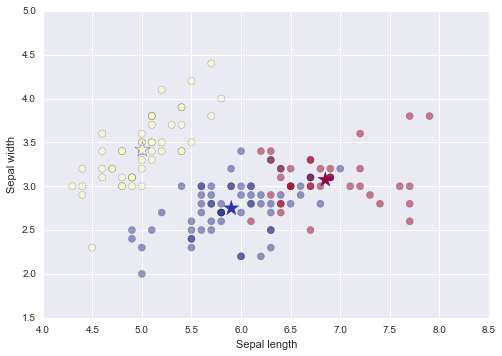

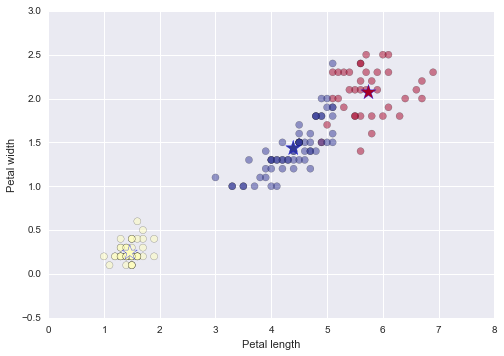

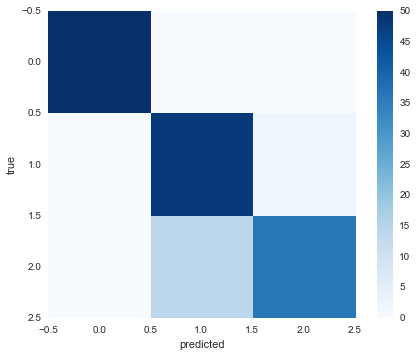

In [6]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

### Insert your code here and explain your steps in markdown cells
dataIris = load_iris()
X = dataIris.data
y = dataIris.target

# Applying KMeans 
k_means = KMeans(n_clusters=3)
clusters = k_means.fit_predict(X)

label_test = [0,1,2] # since it gives me error when placing the centroids I made my own labels, so that the colors would match

#Plotting first two features(Sepal length/width)
plt.scatter(X[:,0], X[:,1], c=clusters, s=50, cmap='RdYlBu_r', alpha=0.5)
#Plotting centroids
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], marker='*', s=250, c=label_test, cmap='RdYlBu_r',edgecolor='b')
plt.ylabel('Sepal width')
plt.xlabel('Sepal length')
plt.show()

#Plotting last two featues(Petal length/width)
plt.scatter(X[:,2], X[:,3], c=clusters, s=50, cmap='RdYlBu_r', alpha=0.5)
#Plotting centroids
plt.scatter(k_means.cluster_centers_[:,2], k_means.cluster_centers_[:,3], marker='*', s=250, c=label_test, cmap='RdYlBu_r', edgecolor='b')
plt.ylabel('Petal width')
plt.xlabel('Petal length')
plt.show()

from scipy.stats import mode
# Permutating the labels
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

# Here is a piece of code to plot the confusion matrix
plt.imshow(confusion_matrix(y, labels), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

Let's check the accuracy now:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, labels)

## 3. Application of KMeans to Digits

For another closer-to-real-world example, let's again take a look at the digits data. Here we'll use KMeans to automatically cluster the data in 64 dimensions, and then look at the cluster centers to see what the algorithm has found.

+ Load Digits dataset.
+ Apply KMeans.
+ Visualize the averaged digits (hint reshape your 64 feature vector to an 8x8 matrix).
+ Permute the cluster labels if necessary (they are probably not the same as the real labels).
+ How accurate is the KMeans classifier?
+ Plot the confusion matrix.

In [ ]:
from sklearn.datasets import load_digits

### Insert your code here and explain your steps in markdown cells
digits = load_digits()
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

We see ten clusters in 64 dimensions, which were automatically generated by the KMeans algorithm.

In [ ]:
#Visualizing each of these cluster centers to see what they represent
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8,8)), cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose means are recognizable digits (with apologies to the number 8)!

The cluster labels are permuted; let's fix this:


In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

For good measure, let's use our PCA visualization and look at the true cluster labels and K-means cluster labels:

In [ ]:
from sklearn.decomposition import PCA
# remove
X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow',10), edgecolor='none',alpha=0.6)
fig,ax = plt.subplots(1,2, figsize=(8,4))
ax[0].scatter(X[:,0], X[:,1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:,0], X[:,1], c=digits.target, **kwargs)
ax[1].set_title('true label')

Let's see how accurate our K-Means classifier is with no label information:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

Almost 80% - not bad! Compared to the previous estimator this is actually not bad at all.
However having in mind that it is entirely unsupervised learning estimator, which had no idea about the labels, this is very impresice score.

In [ ]:
plt.imshow(confusion_matrix(digits.target, labels), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

## 4. Example: KMeans for Color Compression

Just for fun, here is another interesting application of clustering: color image compression. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and conversely a large number of pixels will have similar or identical colors.

Scikit-learn has a number of images that you can play with, accessed through the datasets module. For example:

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False);

The image itself is stored in a 3-dimensional array, of size ``(height, width, RGB)``:

In [ ]:
china.shape

We can envision this image as a cloud of points in a 3-dimensional color space. We'll rescale the colors so they lie between 0 and 1, then reshape the array to be a typical scikit-learn input:

In [ ]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

We now have 273,280 points in 3 dimensions.

Our task is to use KMeans to compress the $256^3$ colors into a smaller number (say, 64 colors). Basically, we want to find $N_{color}$ clusters in the data, and create a new image where the true input color is replaced by the color of the closest cluster.

In [ ]:
# reduce the size of the image for speed
image = china[::3, ::3]
n_colors = 64

X = (image / 255.0).reshape(-1, 3)
    
model = KMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))

Compare the input and output image: we've reduced the $256^3$ colors to just 64.